# Real Estate Prices Prediction

## Project Scoping

*Can we build a model to better predict transaction prices of real estate prices?*

### Specifics

1. Deliverable: Trained model file
2. Machine Learning Task: Regression
3. Target Variable: Transaction Price
4. Input Features: 22 independent variable including `Public records for the property`, `Property characteristics`, `Location convenience scores`, `Neighborhood demographics`, `Schools`
5. Win Condition: Mean Absolute Error (MAE) < $70,000

### Outline

1. Load packages and read data
2. Data Summary
3. Exploratory Data Analysis
4. Data Cleaning
5. Feature Engineering and Preprocessing
6. Model Development
7. Model Selection
8. Reference

## Load libraries and data

In [6]:
### import the libraries
# %load_ext watermark ## For watermark

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100) # expands the maximum number of columns Pandas is allowed

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

In [7]:
%watermark -a 'Yama Chang' -d -t -v -p pandas,numpy,sklearn,watermark

Author: Yama Chang

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.10.0

pandas   : 1.5.3
numpy    : 1.23.5
sklearn  : 1.2.1
watermark: 2.4.3



In [13]:
### import the dataset

# Load real estate data from CSV
df = pd.read_csv('real_estate_data.csv')

# Success
print("REIT dataset has {} data points with {} variables each.".format(*df.shape))

REIT dataset has 1883 data points with 26 variables each.


## Data Summary

### Data Dictionary

* The dataset has 1883 observations in the county where the REIT operates.
* Each observation is for the transaction of one property only.
* Each transaction was between `$200,000` and `$800,000`.

**Target variable**
* 'tx_price' - Transaction price in USD

**Public records for the property**
* 'tx_year' - Year the transaction took place
* 'property_tax' - Monthly property tax
* 'insurance' - Cost of monthly homeowner's insurance

**Property characteristics**
* 'beds' - Number of bedrooms
* 'baths' - Number of bathrooms
* 'sqft' - Total floor area in squared feet
* 'lot_size' - Total outside area in squared feet
* 'year_built' - Year property was built
* 'basement' - Does the property have a basement?

**Location convenience scores**
* 'restaurants' - Number of restaurants within 1 mile
* 'groceries' - Number of grocery stores within 1 mile
* 'nightlife' - Number of nightlife venues within 1 mile
* 'cafes' - Number of cafes within 1 mile
* 'shopping' - Number of stores within 1 mile
* 'arts_entertainment' - Number of arts and entertainment venues within 1 mile
* 'beauty_spas' - Number of beauty and spa locations within 1 mile
* 'active_life' - Number of gyms, yoga studios, and sports venues within 1 mile
Neighborhood demographics
* 'median_age' - Median age of the neighborhood
* 'married' - Percent of neighborhood who are married
* 'college_grad' - Percent of neighborhood who graduated college
Schools
* 'num_schools' - Number of public schools within district
* 'median_school' - Median score of the public schools within district, on the range 1 - 10

## Exploratory Data Analysis

In [15]:
# Data type (.dtypes attribute actually returns a Pandas Series)
# int64, float64 are numeric vars
# object(s) are categorical vars
df.dtypes

# Type of df.types
# type(df.dtypes) # pandas.core.series.Series

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

In [23]:
# Display first 5 observations
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


First, let's plot distributions using **histogram** to get to know about...

* Distributions that don't make sense (e.g a large spike in houses with 10 bedrooms) 2.Potential outliers that don't make sense
* Sparse data
* Numeric features that should be categorical
* Features that should be binary
* Boundaries that don't make sense (e.g.percent married of above 100 or below 0)

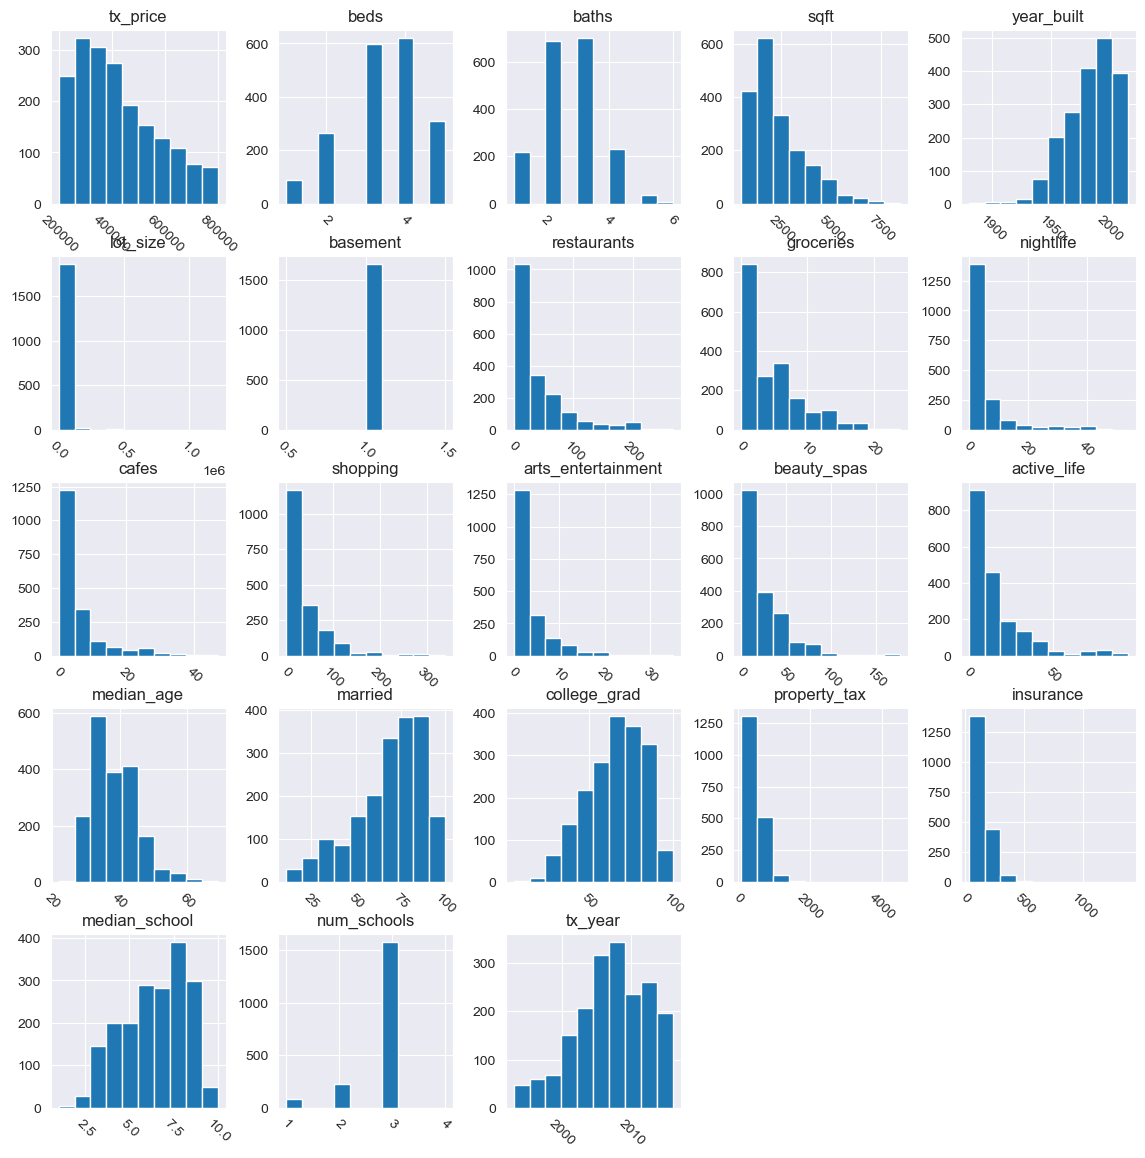

In [31]:
# Plot histogram grid to check numeric vars
df.hist(figsize=(14, 14), xrot=-45)
plt.show()

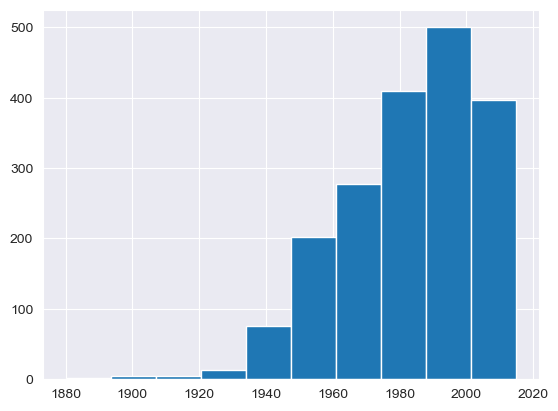

In [22]:
# For example, let's look at the plot for just 'year_built' feature...
df.year_built.hist() # What's the maximum year of built?
plt.show()

In [21]:
# Let's take a look at the formal summary statistics
# Pandas comes with a .describe() function for summary statistics
df.describe() # max value of year_built is 2015

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


In [33]:
# Summarize categorical features
# By default, .describe() only summarizes numerical features
# However, we can tell it to summarize categorical features using the include= argument
df.describe(include = ['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


Let's visualize categorical information using Bar Plot.

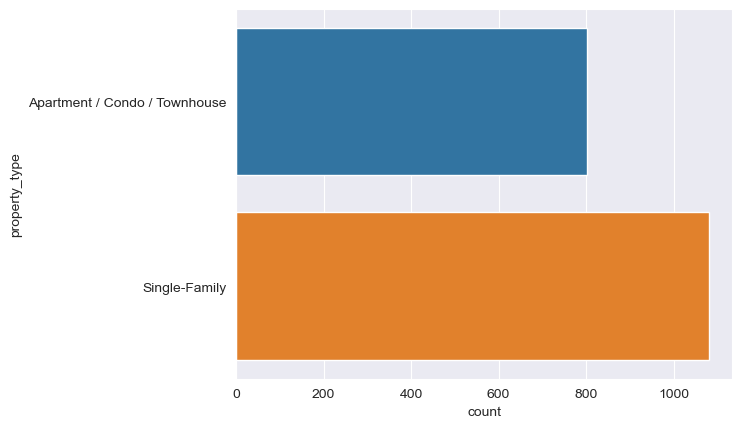

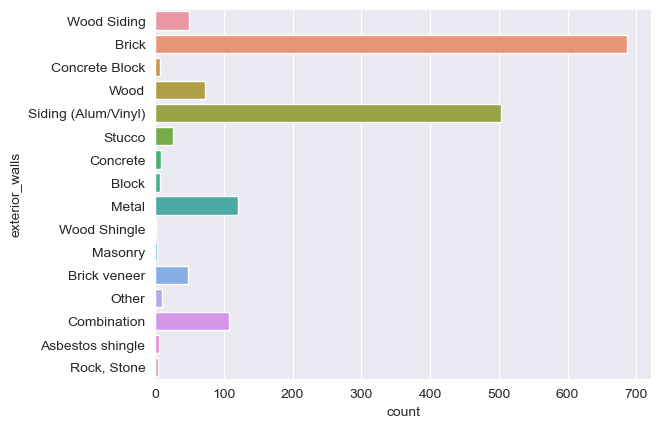

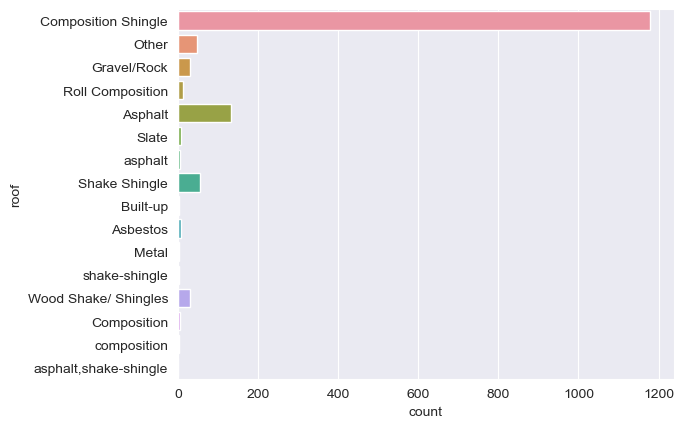

In [35]:
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y = feature, data = df)
    plt.show()
    
# both roof and exterior_walls may suffer from sparse classes

Note to self: Sparse classes might cause overfitting and we will need to handle these variables during feature engineering.

Next, let's use **box plot** to check the relationship between categorical features and numeric features.

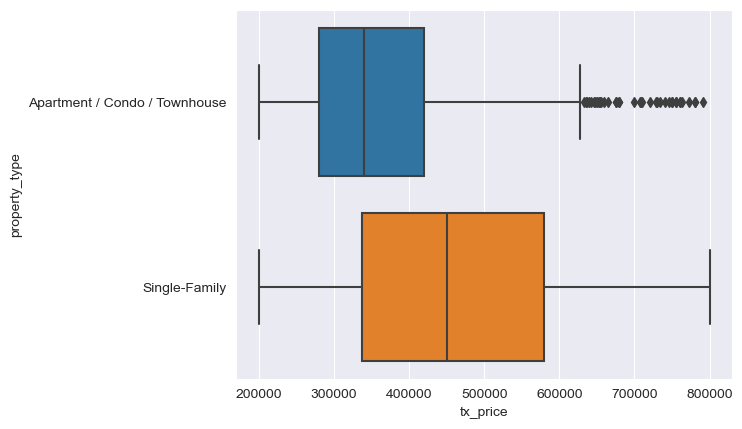

In [36]:
# Segment tx_price by property_type and plot distributions
sns.boxplot(y = 'property_type', x = 'tx_price', data = df)
plt.show()

In general, it looks like single family homes are more expensive than apartments.

In [28]:
# Segment by property_type and display the means within each class
df.groupby('property_type').mean()

/var/folders/d3/9ly5k4s50pn98c5j4xljd3h00000gn/T/ipykernel_39673/1327722384.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('property_type').mean()


,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,366614.034869,2.601494,2.200498,1513.727273,1988.936488,3944.239103,1.0,58.418431,5.919054,7.855542,8.037360,57.631382,4.840598,32.087173,22.410959,37.199253,57.534247,66.372354,346.261519,105.652553,6.382316,2.831880,2007.941469
Single-Family,464644.711111,4.029630,2.862037,2935.865741,1978.523148,20417.666667,1.0,26.672222,3.453704,3.007407,3.308333,28.289815,2.318519,16.970370,10.946296,39.643519,77.685185,64.128704,556.383333,166.329630,6.592593,2.764815,2006.494444


Next, I wanted to run **correlation*** to see the relationships between numeric features and other numeric features.

In [29]:
# Calculate correlations between numeric features
correlations = df.corr()
correlations

/var/folders/d3/9ly5k4s50pn98c5j4xljd3h00000gn/T/ipykernel_39673/2244578033.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,-0.001398,-0.038246,-0.021076,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,-0.464289,-0.388670,-0.442168,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,-0.316836,-0.259603,-0.305885,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,-0.300969,-0.275586,-0.293402,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,-0.102209,-0.121684,-0.195141,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,NaN,-0.113887,-0.118574,-0.072224,-0.098182,-0.116560,-0.067189,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,NaN,1.000000,0.701462,0.926675,0.937616,0.818815,0.726907,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,NaN,0.701462,1.000000,0.565003,0.602857,0.526356,0.502837,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,NaN,0.926675,0.565003,1.000000,0.923901,0.743321,0.703038,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


Let's visualize the correlation matrix!

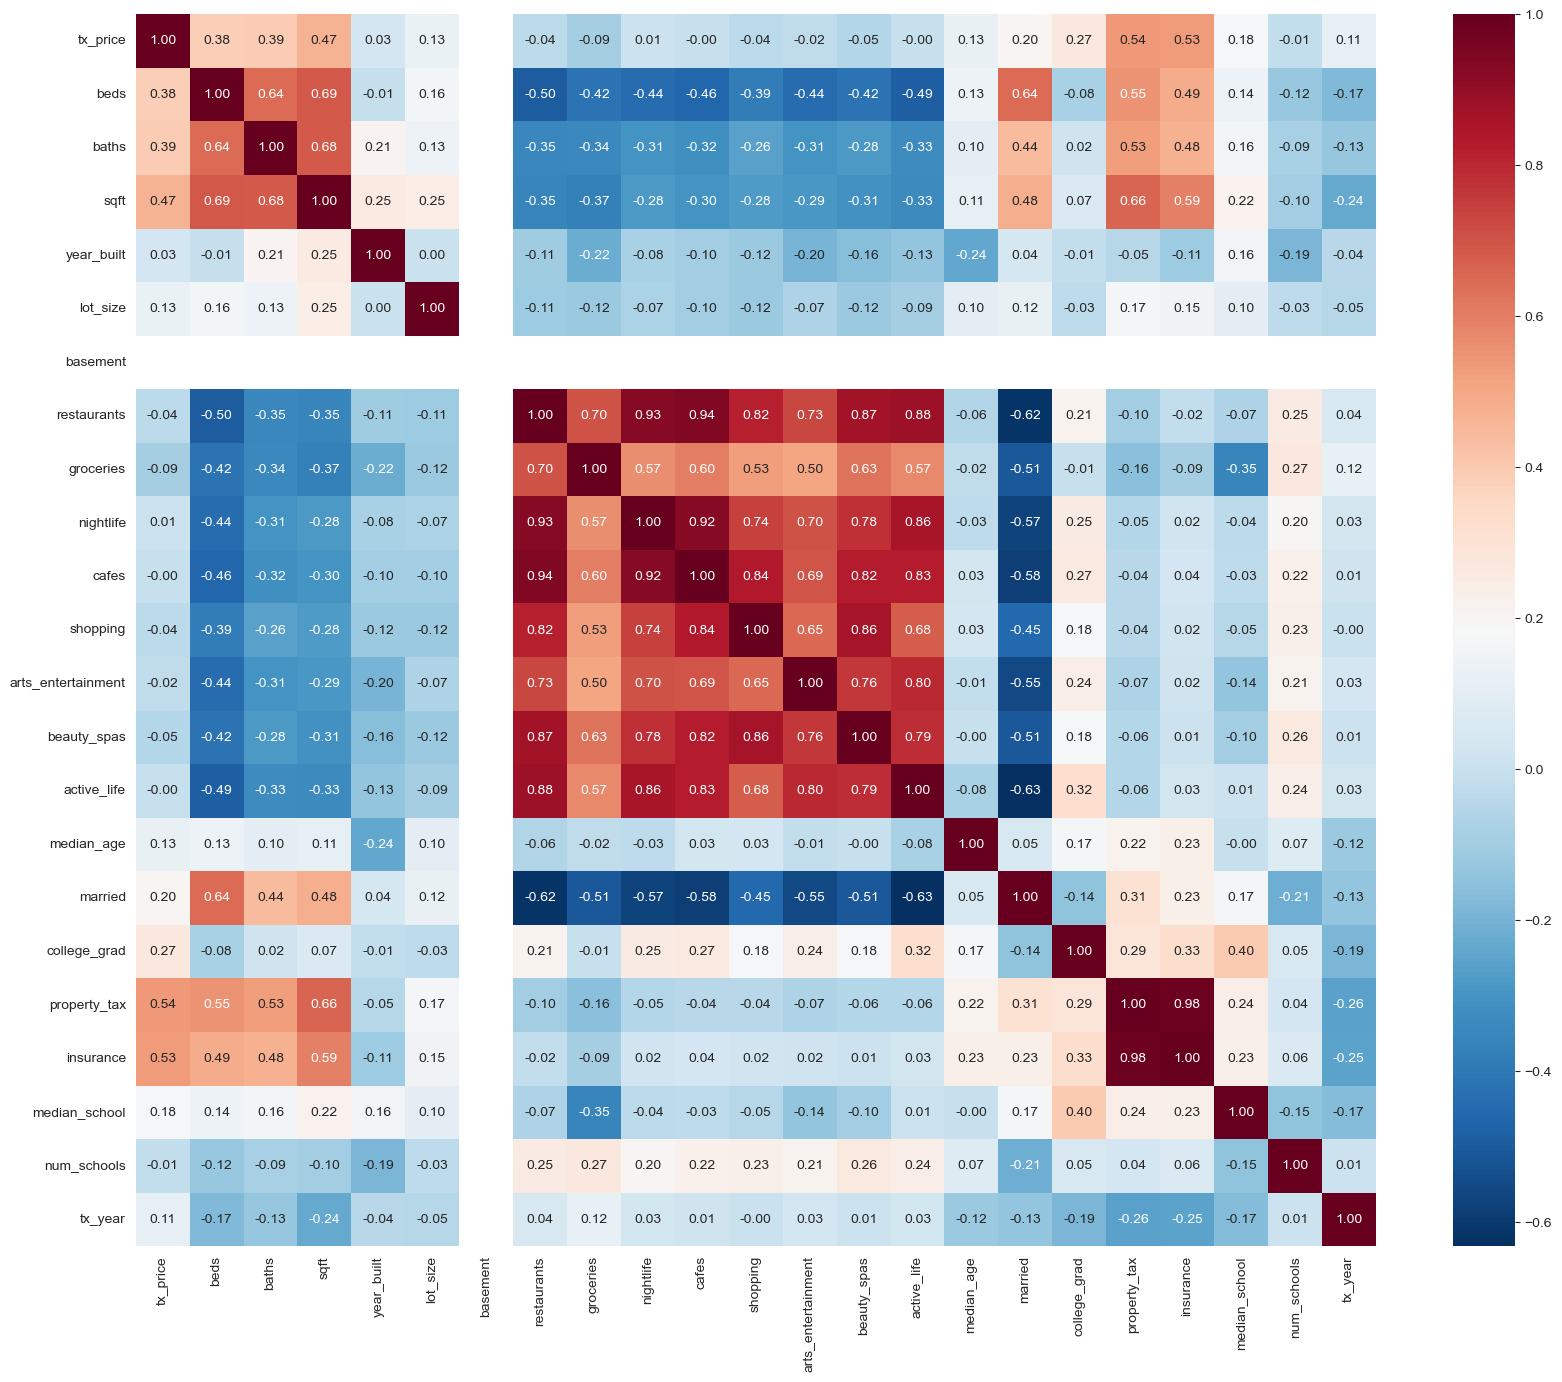

In [37]:
# Change color scheme
sns.set_style('white')

# Increase the figsize to 7 x 6
plt.figure(figsize = (20, 16))

# Plot heatmap of correlations
sns.heatmap(correlations, cmap='RdBu_r', annot=True, fmt=".2f")
plt.show()

In [38]:
# Check correlation between beds and baths and between baths and beds.
df[['beds', 'baths']].corr()

,beds,baths
beds,1.000000,0.644572
baths,0.644572,1.000000


## Data Cleaning
### Fix structural error

First, let's fill NaN in with the value 0

In [40]:
# Display unique values of 'basement'
print( df.basement.unique() )

[nan  1.]


In [41]:
# Missing basement values should be 0
df.basement.fillna(0, inplace=True) # inplace=True to update the values in the original df

In [42]:
# Display unique values of 'basement'
print( df.basement.unique() )

[0. 1.]


Next, let's check for typos or inconsistent capitalization.

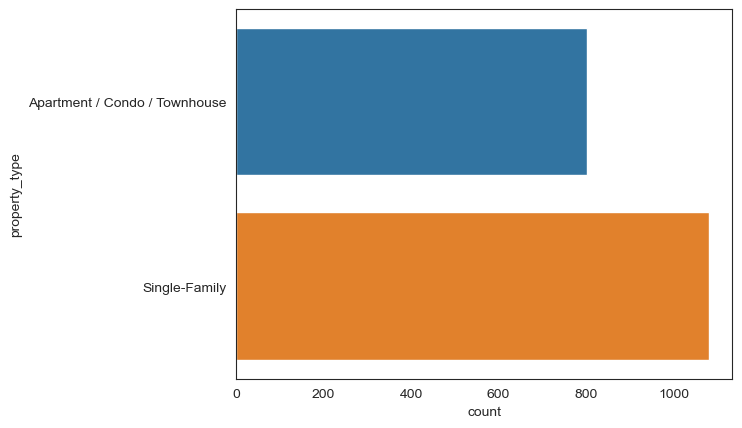

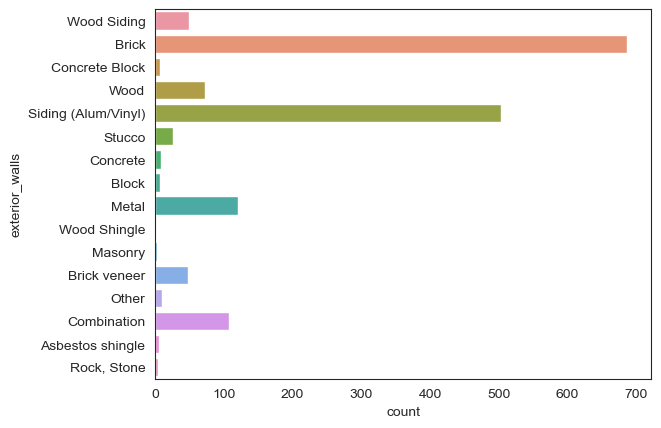

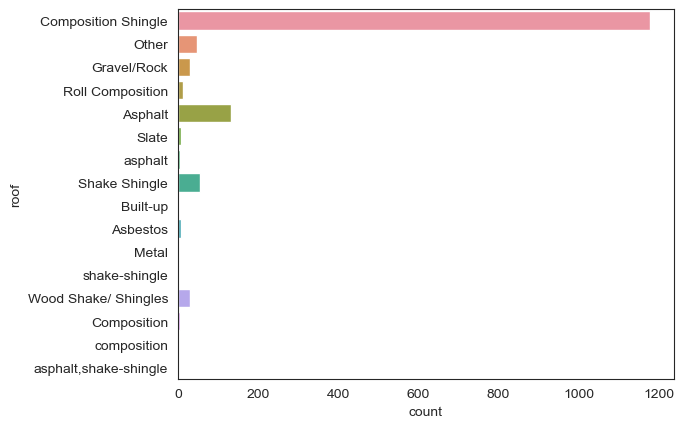

In [44]:
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y = feature, data = df)
    plt.show()
    
# both roof and exterior_walls may suffer from sparse classes

In [47]:
### Let's fix 'roof' first
# 'composition' should be 'Composition'
df.roof.replace('composition', 'Composition', inplace=True)

# 'asphalt' should be 'Asphalt'
df.roof.replace('asphalt', 'Asphalt', inplace=True)

# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

### Let's also fix 'exterior_walls'
# 'Rock, Stone' should be 'Masonry'
df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)

# 'Concrete' and 'Block' should both just be 'Concrete Block'
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)

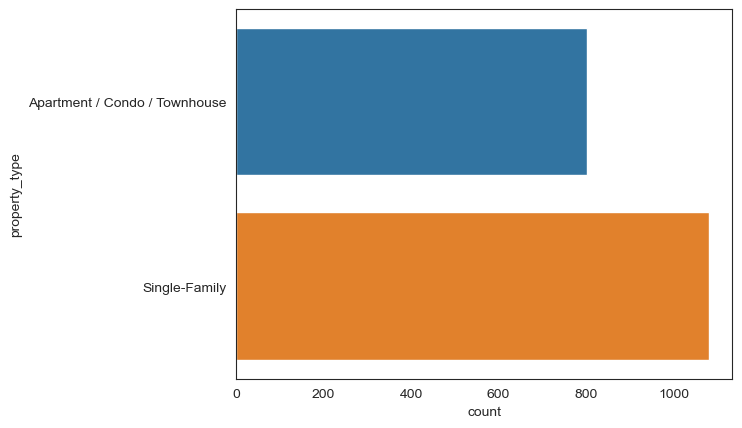

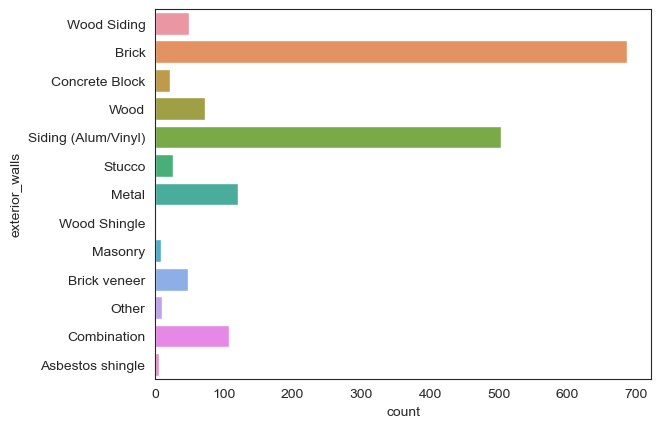

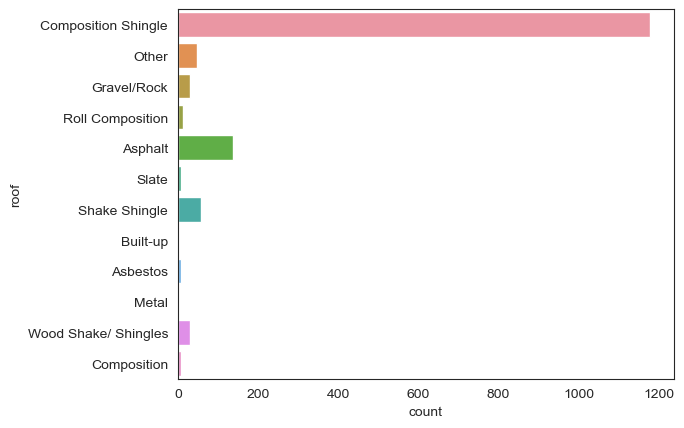

In [48]:
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y = feature, data = df)
    plt.show()

Next, let's check **outliers**.

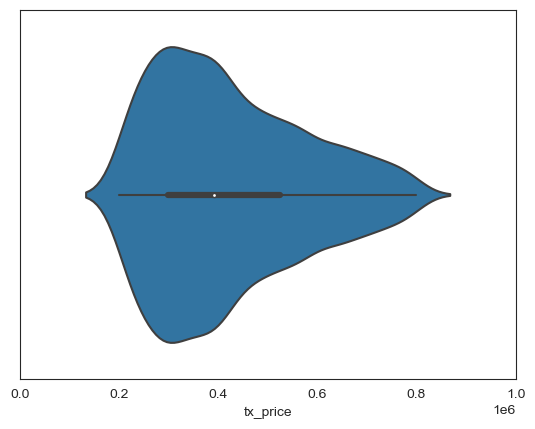

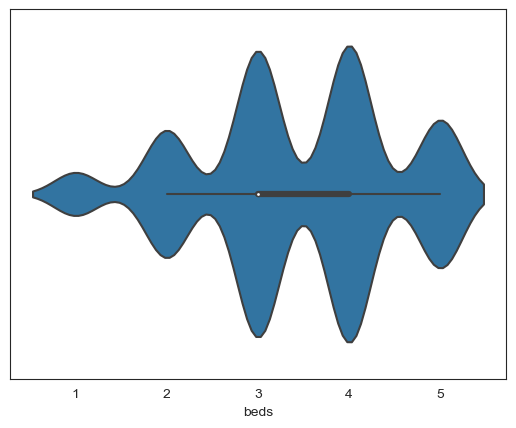

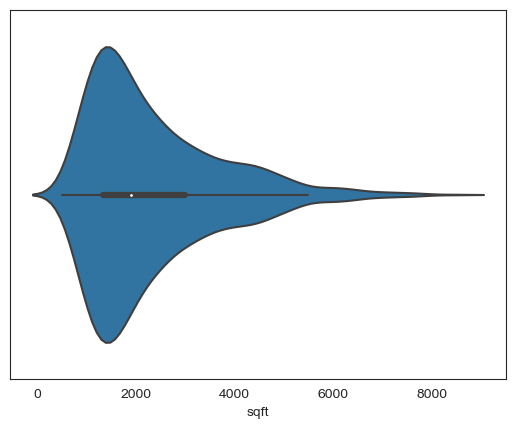

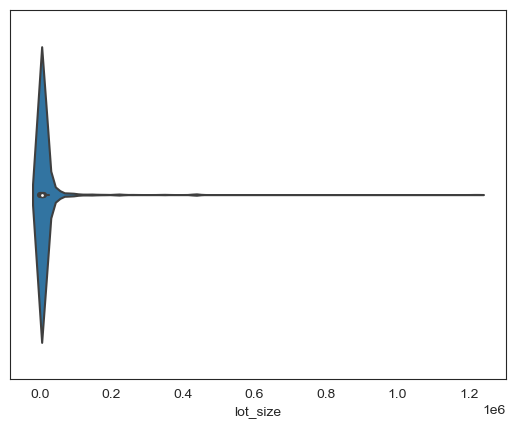

In [52]:
# Violin plot of 'tx_price' using the Seaborn library
sns.violinplot(x=df.tx_price)
plt.xlim(0, 1000000) # setting x-axis range to be consistent
plt.show()

# Violin plot of beds
sns.violinplot(x='beds', data=df)
plt.show()

# Violin plot of sqft
sns.violinplot(x='sqft', data=df)
plt.show()

# Violin plot of lot_size
sns.violinplot(x='lot_size', data=df)
plt.show()

It looks like `lot_size` has a potential outlier as it has a long and skinny tail. Let's look at the largest 5 lot sizes just to confirm.

In [53]:
df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1832     436035
1876     436035
1839     435600
Name: lot_size, dtype: int64

In [55]:
# Check size `1220551`
df[df.lot_size == 1220551]

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
102,292999,2,1,875,1950,1220551,Apartment / Condo / Townhouse,Brick,NaN,0.0,63,11,11,8,39,18,42,44,33.0,35.0,87.0,230.0,79.0,6.0,3.0,2014


In [57]:
# Remove observations with lot_size greater than 500,000 sqft
df = df[df.lot_size < 500000]

# print length of df
print( len(df) )

1882


Last, let's handle **missing data**.

In [58]:
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

Label missing **categorical values** as `Missing`.

In [63]:
for column in df.select_dtypes(include=['object']):
    df[column].fillna('Missing', inplace=True)

# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

Next, let's find and count missing values in **numerical** features.

In [61]:
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

Great! There's no missing value in numerical features. Now we can save our data for feature engineering and model development/prediction/evaluation.

In [66]:
df.to_csv('cleaned_df.csv', index=None)

## Feature Engineering and Preprocessing

### Feature Engineering

#### 1. Domain knowledge research

After doing some researching, I found that some background knowledge would be helpful for our feature engineering and model building.

1. Homes with 2 bedrooms and 2 bathrooms are especially popular for investors.
2. According to data from Zillow, the lowest housing prices were from 2010 to end of 2013 (country-wide).

<figure>
    <img src="Home-Sales-Recession.png" alt="Alt Text" style="width: 500px; height: 300px;" />
    <figcaption style="text-align:center; font-style: italic;">Plot downloaded from Zillow</figcaption>
</figure>


In [19]:
# First, let's cerate an indicator variable just for properties with 2 beds and 2 baths
df['two_b_two_b'] = ((df.beds == 2) & (df.baths == 2)).astype(int)

# Display percent of rows where two_b_two_b == 1
print( df.two_b_two_b.mean() )

0.09458023379383634


Almost 9.5% of the transactions in our dataset were for properties with 2 beds and 2 baths.

In [20]:
# Next, let's create another indicator variable to represent housing price during recession (2010-2013)
df['during_recession'] = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int)

# Display percent of rows where recession == 1
print( df.during_recession.mean() ) # 26.4%

0.2635494155154091


26% of transactions in our dataset were during the recession.

#### 2. Create new feature(s) based on current features

Next, let's see if we can create new features based on current features.

In [22]:
# Create a property age feature
df['property_age'] = df.tx_year - df.year_built

# Quick sanity check: should not be less than 0
print( df.property_age.min() ) # something's weird, need to check

-8


In [23]:
# Check for property age, how many of them less than 0? (This doesn't make sense.)
print( sum(df.property_age < 0) )

19


We have 19 houses bought before built. However, it's possible some homeowners bought houses before the construction company built them. This is reasonable, especially with single-family homes. However, for our original problem, we are only interested in houses that already exist because our client only buys existing ones. We should remove these 19 houses.

In [25]:
# Remove rows where property_age is less than 0
df = df[df.property_age >= 0]

# Print number of rows in remaining dataframe
print( len(df) )

1863


In [32]:
print( sum(df.property_age < 0) )

0


In [34]:
# Create a school score feature
df['school_score'] = df.num_schools*df.median_school

print( df.school_score.median() )

18.0


In [35]:
df['school_score'].describe()

count    1863.000000
mean       17.982823
std         6.465535
min         3.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        30.000000
Name: school_score, dtype: float64

#### 3. Group sparse classes

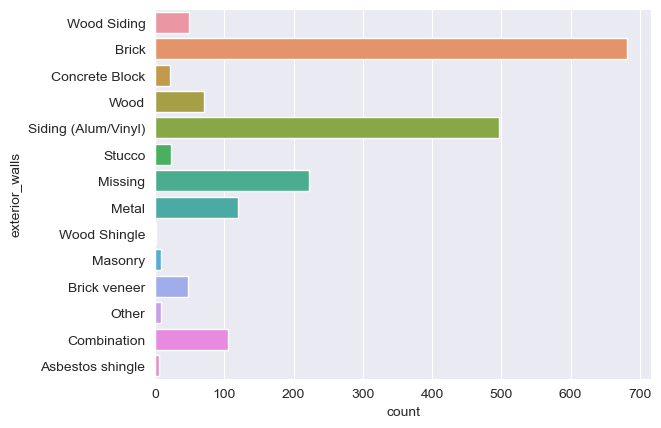

In [29]:
# Bar plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)
plt.show()

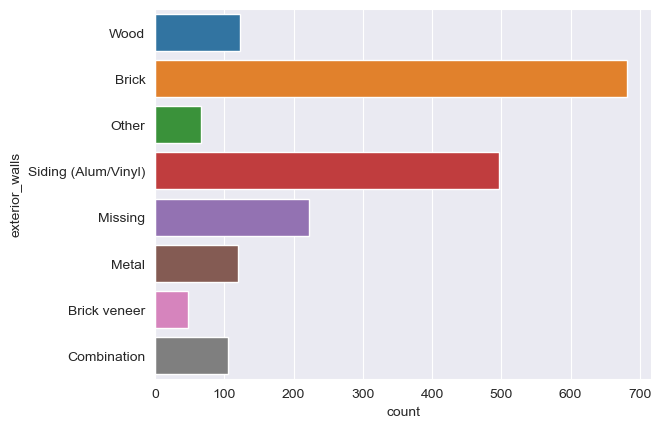

In [31]:
# Let's group Wood Siding', 'Wood Shingle', and 'Wood' together as 'Wood'
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace=True) # replace the values in the original Series instead of making a copy of it

# Next, we group remaining sparse classes into a single 'Other' class
other_exterior_walls = ['Concrete Block', 'Stucco', 'Masonry', 'Other', 'Asbestos shingle']
df.exterior_walls.replace(other_exterior_walls, 'Other', inplace=True)

# Check Bar plot again for exterior_walls
sns.countplot(y='exterior_walls', data=df)
plt.show()

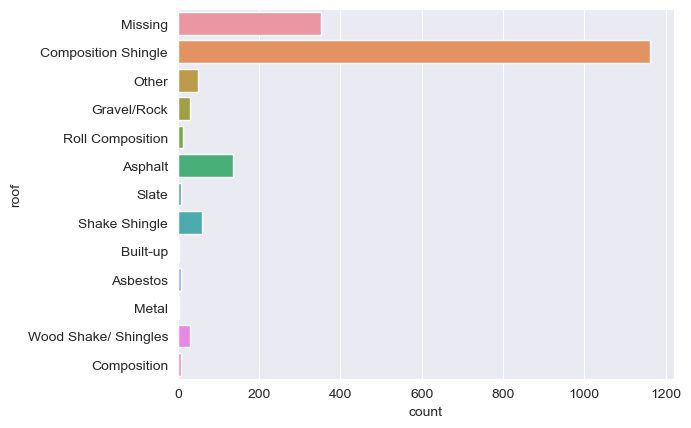

In [36]:
# Bar plot for roof
sns.countplot(y='roof', data=df)
plt.show()

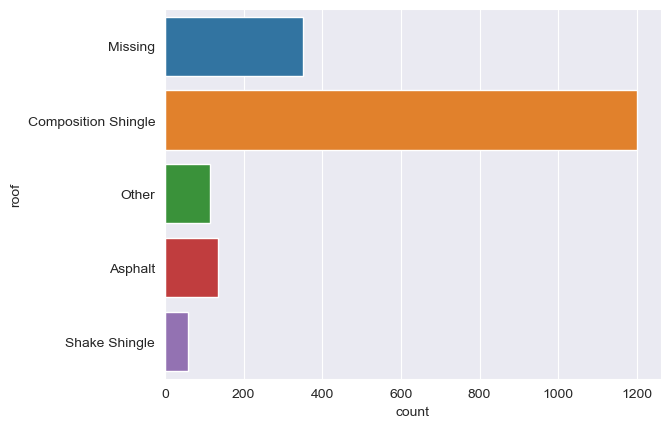

In [38]:
# Group 'Composition' and 'Wood Shake/ Shingles' into the 'Composition Shingle' class
df.roof.replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingle', inplace=True)

# List of classes to group
roof_other_groups = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']

# Group other classes into 'Other'
df.roof.replace(roof_other_groups, 'Other', inplace=True)

sns.countplot(y='roof', data=df)
plt.show()

#### 4. Dummy Variables

Python machine learning algorithms cannot handle categorical features directly especially with text data. Therefore, we need to create dummy variables for our categorical features.

In [45]:
# Store column names in an object
cat_var = df.select_dtypes(include=['object']).columns.tolist()
cat_var

['property_type', 'exterior_walls', 'roof']

In [46]:
# Get dummies for all categorical variables
pd.get_dummies( df, columns=cat_var ).head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_b_two_b,during_recession,property_age,school_score,property_type_Apartment / Condo / Townhouse,property_type_Single-Family,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,0,27.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,41,9.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,1,49,24.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,5,27.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,10,27.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [47]:
# Create a new df name
df1 = pd.get_dummies( df, columns=cat_var )

In [49]:
# Let's do a sanity check!
df1.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_b_two_b,during_recession,property_age,school_score,property_type_Apartment / Condo / Townhouse,property_type_Single-Family,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,0,27.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,41,9.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,1,49,24.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,5,27.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,10,27.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [53]:
# Number of rows
print( df1.shape[1] )

42


#### 5. Redundant features

Let's remove `tx_year` and `year_built` as we don't need these features anymore. We have created a new feature `property_age`.

In [54]:
df1.drop(['tx_year', 'year_built'], axis=1, inplace=True)

In [55]:
# Do a final visual check to see if there's anything weird
df1.head()

,tx_price,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_b_two_b,during_recession,property_age,school_score,property_type_Apartment / Condo / Townhouse,property_type_Single-Family,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle
0,295850,1,1,584,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,0,1,0,27.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,216500,1,1,612,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,0,0,41,9.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,279900,1,1,615,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,0,1,49,24.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,379900,1,1,618,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,0,0,5,27.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,340000,1,1,634,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,0,0,10,27.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [56]:
# Save ABT table as CSV
df1.to_csv( 'analytical_base_table.csv', index=None)

## References

* [Zillow Research regarding housing market recession](https://www.zillow.com/research/home-builders-market-fears-16551/)